In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
sample=pd.read_csv("sample_submission.csv")

In [4]:
store=pd.read_csv('store.csv')

In [5]:
train_data 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [8]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [9]:
store=pd.read_csv('store.csv')

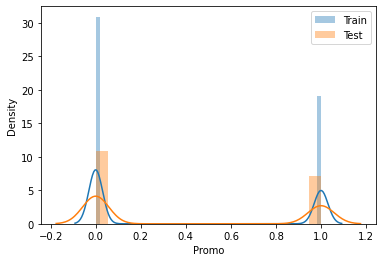

In [10]:
# Check for distribution in both training and test sets
sns.distplot(train_data['Promo'], label='Train')
sns.distplot(test_data['Promo'], label='Test')
plt.legend()
plt.show()


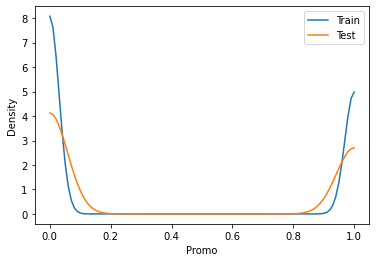

In [13]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the kernel density estimate for the Promo column in the training and test sets
train_kde = gaussian_kde(train_data['Promo'])
test_kde = gaussian_kde(test_data['Promo'])

# Define the range of x values to plot
x = np.linspace(0, 1, 100)

# Plot the kernel density estimate for the training and test sets
plt.plot(x, train_kde(x), label='Train')
plt.plot(x, test_kde(x), label='Test')

# Add labels and legend
plt.xlabel('Promo')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [14]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [17]:
holiday_sales = train_data.groupby(['StateHoliday', 'Date'])['Sales'].sum().reset_index()


In [18]:
holiday_sales 

,StateHoliday,Date,Sales
0,0,2014-01-19,152110
1,0,2014-01-20,10648819
2,0,2014-01-21,8475207
3,0,2014-01-22,7970289
4,0,2014-01-23,7625568
...,...,...,...
955,b,2015-04-06,272921
956,c,2013-12-25,142585
957,c,2013-12-26,188597
958,c,2014-12-25,155386


In [19]:
 # Assuming '1' indicates holidays, create a new column 'Holiday' to indicate whether it's a holiday or not
train_data['Holiday'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

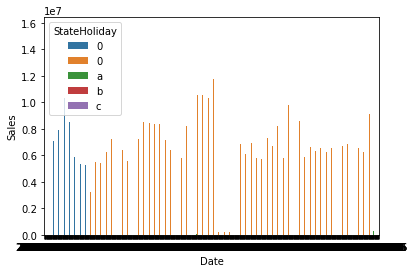

In [20]:
# Check & compare sales behavior before, during and after holidays
sns.barplot(x='Date', y='Sales', hue='StateHoliday', data=holiday_sales)
plt.show()

In [21]:
print(train_data.columns)


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Holiday'],
      dtype='object')


In [22]:
# Split the data into three groups: before holiday, during holiday, and after holiday
before_holiday_sales = train_data[train_data['Holiday'] == 0]['Sales']
during_holiday_sales = train_data[train_data['Holiday'] == 1]['Sales']
after_holiday_sales = train_data[train_data['Holiday'].shift(-1) == 1]['Sales']  # Shift to identify after holiday
# Calculate the average sales for each group
average_sales_before_holiday = before_holiday_sales.mean()
average_sales_during_holiday = during_holiday_sales.mean()
average_sales_after_holiday = after_holiday_sales.mean()

In [23]:
average_sales_before_holiday 

5980.279716566853

In [24]:
average_sales_during_holiday

4684.874236685952

In [25]:
average_sales_after_holiday 

4787.798768828413

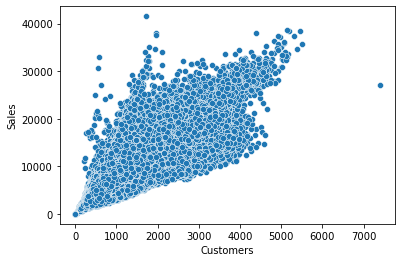

In [26]:
# What can you say about the correlation between sales and number of customers?
sns.scatterplot(x='Customers', y='Sales', data=train_data)
plt.show()

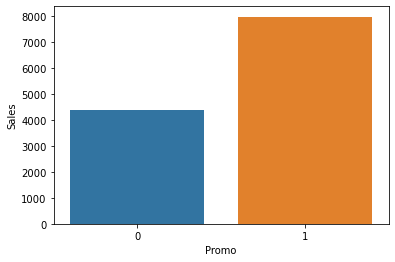

In [27]:
# How does promo affect sales?
promo_sales = train_data.groupby(['Promo'])['Sales'].mean().reset_index()
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.show()


In [28]:
promo_customers = train_data.groupby(['Promo'])['Customers'].mean().reset_index()
promo_customers

,Promo,Customers
0,0,517.823542
1,1,820.098815


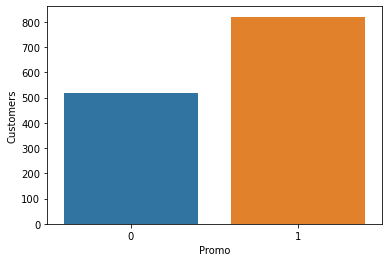

In [29]:
# Are the promos attracting more customers?
sns.barplot(x='Promo', y='Customers', data=promo_customers)
plt.show()

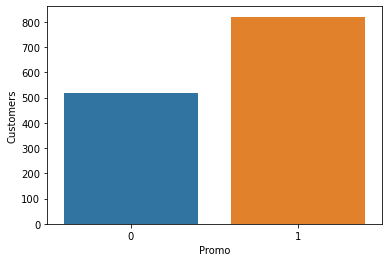

In [30]:
# How does it affect already existing customers?
promo_existing_customers = train_data[train_data['Date'] > train_data['Date'].min()].groupby(['Promo'])['Customers'].mean().reset_index()
sns.barplot(x='Promo', y='Customers', data=promo_existing_customers)
plt.show()

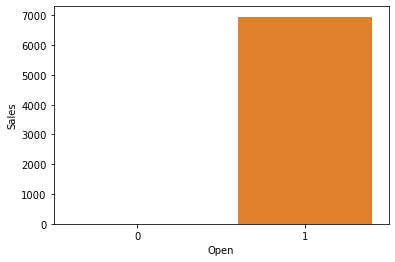

In [31]:
# Trends of customer behavior during store open and closing times
open_close_sales = train_data.groupby(['Open'])['Sales'].mean().reset_index()
sns.barplot(x='Open', y='Sales', data=open_close_sales)
plt.show()


In [32]:
# Which stores are opened on all weekdays?
weekday_open_stores = train_data[train_data['DayOfWeek'] < 6].groupby(['Store'])['Open'].sum().reset_index()
all_weekday_open_stores = weekday_open_stores[weekday_open_stores['Open'] == 5]['Store']

In [33]:
weekday_open_stores

,Store,Open
0,1,647
1,2,650
2,3,646
3,4,650
4,5,645
...,...,...
1110,1111,646
1111,1112,646
1112,1113,650
1113,1114,650


In [34]:
all_weekday_open_stores

Series([], Name: Store, dtype: int64)

In [35]:
weekend_sales = train_data[(train_data['DayOfWeek'] >= 6) & (train_data['Store'].isin(all_weekday_open_stores))].groupby(['Store'])['Sales'].mean().reset_index()
weekend_sales

,Store,Sales


In [36]:
# stores opened in weekdays (open = 1)
week_data = train_data[['Store', 'DayOfWeek','Open', 'Sales','Customers']]
week_data = week_data[week_data['Open'] == 1]
storeW_data = week_data[['Store', 'DayOfWeek']].groupby('Store').nunique()
storeW_data = storeW_data[storeW_data['DayOfWeek'] == 7].reset_index()
storeW_data

,Store,DayOfWeek
0,85,7
1,122,7
2,209,7
3,259,7
4,262,7
5,274,7
6,299,7
7,310,7
8,335,7
9,353,7


In [37]:
# Assuming '1' indicates holidays, create a new column 'Holiday' to indicate whether it's a holiday or not
train_data['Holiday'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Define functions to identify the summer, winter, and autumn seasons based on specific months
def is_summer(date):
    return date.month in [6, 7, 8]

def is_winter(date):
    return date.month in [12, 1, 2]

def is_autumn(date):
    return date.month in [9, 10, 11]



In [38]:
# Create new columns to indicate the summer, winter, and autumn seasons
train_data['Summer'] = train_data['Date'].apply(lambda x: 1 if is_summer(pd.to_datetime(x)) else 0)
train_data['Winter'] = train_data['Date'].apply(lambda x: 1 if is_winter(pd.to_datetime(x)) else 0)
train_data['Autumn'] = train_data['Date'].apply(lambda x: 1 if is_autumn(pd.to_datetime(x)) else 0)

In [39]:
# Group the data by each season to calculate the average number of customers for summer, winter, and autumn
average_customers_summer = train_data.groupby('Summer')['Customers'].mean()
average_customers_winter = train_data.groupby('Winter')['Customers'].mean()
average_customers_autumn = train_data.groupby('Autumn')['Customers'].mean()

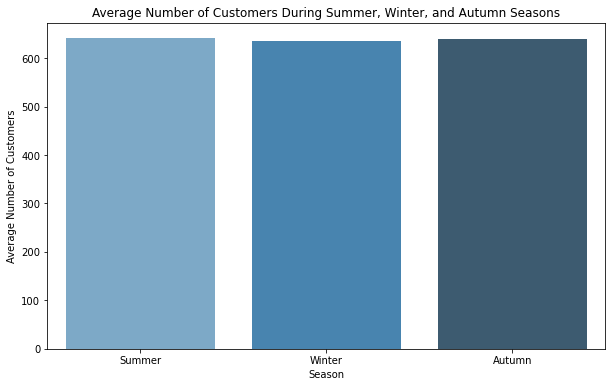

In [40]:
# Create a bar plot for summer, winter, and autumn seasons on the same plot
plt.figure(figsize=(10, 6))
sns.barplot(x=['Summer', 'Winter', 'Autumn'],
            y=[average_customers_summer[1], average_customers_winter[1], average_customers_autumn[1]],
            palette='Blues_d')
plt.title('Average Number of Customers During Summer, Winter, and Autumn Seasons')
plt.xlabel('Season')
plt.ylabel('Average Number of Customers')
plt.show()